In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tsplib95
from FINDER_test_utils import *
import pandas as pd
import numpy as np
import networkx as nx
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
base_path = 'best_models/tsp_2d/'

In [4]:
trainfolder_list = ['nrange_15_20_len_1011505', 'nrange_15_20_len_1013181', 'nrange_15_20_len_1016877', 
                    'nrange_15_20_len_1048982', 'nrange_15_20_len_1012512_gamma_1.0_eps_1.0_changjun-net']

In [5]:
df_list = []
for folder in trainfolder_list:
    fnames = os.listdir(base_path+folder)
    for fname in fnames:
        if '.csv' in fname:
            df_list.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['opt_approx']))

In [6]:
for df in df_list:
    df['iteration'] = np.array(df.index)*300

In [7]:
min_points = []
for df in df_list:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)

In [8]:
min_points[0][0][0]

1.0115046880721763

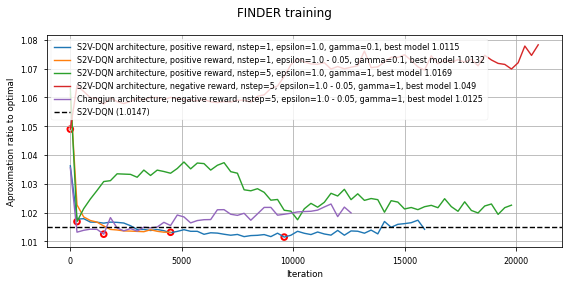

In [10]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 1, figsize=(8,4), sharex=True, sharey=True)
#df.plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training')
df_list[0].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'S2V-DQN architecture, positive reward, nstep=1, epsilon=1.0, gamma=0.1, best model {np.round(min_points[0][0][0],4)}')
df_list[1].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'S2V-DQN architecture, positive reward, nstep=1, epsilon=1.0 - 0.05, gamma=0.1, best model {np.round(min_points[1][0][0],4)}')
df_list[2].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'S2V-DQN architecture, positive reward, nstep=5, epsilon=1.0, gamma=1, best model {np.round(min_points[2][0][0],4)}')
df_list[3].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'S2V-DQN architecture, negative reward, nstep=5, epsilon=1.0 - 0.05, gamma=1, best model {np.round(min_points[3][0][0],4)}')
df_list[4].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'Changjun architecture, positive reward, nstep=5, epsilon=1.0 - 0.05, gamma=1, best model {np.round(min_points[4][0][0],4)}')

for k, min_point in enumerate(min_points):
    axs.scatter(x=min_point[0][1], y=min_point[0][0], facecolors='none', linewidths=2, edgecolors='red')
                # label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')
axs.grid(True, axis='both')
axs.axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs.legend(loc='upper left')
axs.set_ylabel('Aproximation ratio to optimal')
axs.set_xlabel('Iteration')
plt.suptitle('FINDER training')
plt.tight_layout()

plt.savefig('plots/training_process.png', dpi=400)

In [8]:
folder_0 = 'tsp_min-n=15_max-n=20_num-graph=1000_type=random'
folder_1 = 'tsp_min-n=40_max-n=50_num-graph=1000_type=random'
folder_2 = 'tsp_min-n=50_max-n=100_num-graph=1000_type=random'
folder_names = [folder_0, folder_1, folder_2]

# result_dir = 'results/tsp_min-n=15_max-n=20_num-graph=1000_type=random/'
# data_dir = 'test_sets/tsp_min-n=15_max-n=20_num-graph=1000_type=random/'

In [11]:
mean_approx_ratios = []
for folder in folder_names:
    result_dir = f'results/{folder}/'
    data_dir = f'test_sets/{folder}/'
    fnames, approx_ratios, test_lengths, solutions = get_data_from_result_files(data_dir, result_dir)
    mean_approx_ratios.append(np.mean(approx_ratios))

Generating approx ratios
Generating approx ratios
Generating approx ratios


In [12]:
mean_approx_ratios

[1.0140535163787296, 1.0431829264720587, 1.0764999361759018]

In [44]:
s2v_dqn_mean_approx_ratios = [1.0147, 1.0511, 1.0702]

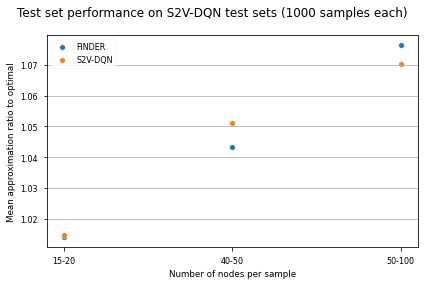

In [48]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 1, figsize=(6,4), sharex=True, sharey=True)
x = np.arange(0,len(mean_approx_ratios))
sns.scatterplot(x=x,y=mean_approx_ratios, ax=axs, label='FINDER')
sns.scatterplot(x=x,y=s2v_dqn_mean_approx_ratios, ax=axs, label='S2V-DQN')
axs.grid(True, axis='y')
# axs.axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs.legend(loc='upper left')
axs.set_xticks(x)
axs.set_xticklabels(['15-20', '40-50', '50-100'])
axs.set_ylabel('Mean approximation ratio to optimal')
axs.set_xlabel('Number of nodes per sample')
plt.suptitle('Test set performance on S2V-DQN test sets (1000 samples each)')
plt.tight_layout()

plt.savefig('plots/testset_performance.png', dpi=400)

In [14]:
%load_ext tensorboard

%tensorboard --logdir='./graphs'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
